# 11.1 Capstone: Data Investigation

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Utilities

In [4]:
import datetime

def generate_clean_csv(infile, outfile, debug=False):
    """
    :param infile: File to read with raw data
    :param outfile: CSV file to write once the data has been cleaned and reformatted
    """

    # Timestamp the report
    print(f'Start Time: {datetime.datetime.now().strftime("%D %H:%M:%S")}\n')

    # Read the file
    print('Reading file: {} ... '.format(infile), end='')
    raw_df = pd.read_csv(infile)
    print('Done: {:,d} rows, {:,d} columns'.format(raw_df.shape[0], raw_df.shape[1]))
    if debug:
        raw_df.columns    

    # Convert column names with spaces and upper-case to underscore and lower-case format
    print('... Formatting column names ... ', end='')
    raw_df.columns = raw_df.columns.str.replace(' ', '_').str.lower()
    if debug:
        raw_df.columns    
    print('Done')

    # Create two new datetime and date columns with clean dates
    # raw_df['datetime'] = pd.to_datetime(df.incident_datetime, format='%Y/%m/%d %I:%M:%S %p')
    print('... Creating timeseries columns: datetime and date ... ')
    raw_df['datetime'] = pd.to_datetime(raw_df.incident_datetime, format='mixed')
    raw_df['date'] = pd.to_datetime(raw_df.incident_date, format='mixed')
    print('...... Number of rows where the datetime conversion failed: {:,d}'.format(raw_df.datetime.isnull().sum()))
    print('...... Number of rows where the date conversion failed: {:,d}'.format(raw_df.date.isnull().sum()))
    print('...... Timespan: {} - {}'.format(raw_df.datetime.min(), raw_df.datetime.max()))    
    print('... Done')

    # set datetime as index to create the timeseries
    print('... Setting index to datetime ... ', end='')
    raw_df = raw_df.set_index('datetime')
    print('Done')
    
    print(f'\nCurrent Time: {datetime.datetime.now().strftime("%D %H:%M:%S")}\n')

    if debug:
        raw_df.info()
    
    # Write the file
    print('... Writing file: {} {} ... '.format(outfile, raw_df.shape), end='')
    raw_df.to_csv(outfile)
    print('Done')

    print('Done')
    print(f'\nEnd Time: {datetime.datetime.now().strftime("%D %H:%M:%S")}\n')


In [5]:
def get_clean_data_from_csv(infile):
    """
    :param infile: CSV file to read data from
    :return: Returns DataFrame with index set to the datetime column
    """
    # Read the file
    print('Reading file: {} ... '.format(infile), end='')
    clean_df = pd.read_csv(infile)
    print('Done: {:,d} rows, {:,d} columns'.format(clean_df.shape[0], clean_df.shape[1]))
    
    # Converting datetime and date to timeseries ...
    print('... Converting datetime and date to timeseries ... ', end='')
    clean_df.datetime = pd.to_datetime(clean_df.datetime)
    clean_df.date = pd.to_datetime(clean_df.date)
    print('Done')

    # set datetime as index to create the timeseries
    print('... Setting index to datetime ... ', end='')
    clean_df = clean_df.set_index('datetime')
    print('Done')

    print('Done')

    return clean_df


In [6]:
def graph_features(df, nrows, ncols, figsize=(7,7)):
    """
    Graph all the DataFrame columns as subplots to quickly visualize the features 
    :param df: DataFrame to iterate on
    :param nrows: Number of rows in subplot
    :param ncols: Number of cols in subplot
    :param fisize: list containing (widht, height)
    """
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    
    # Flatten the axes array (makes it easier to iterate over)
    axes = axes.flatten()
    
    # Loop through each column and plot a histogram
    for i, column in enumerate(df.columns):
        
        # Add the histogram
        df[column].hist(ax=axes[i], # Define on which ax we're working on
                        edgecolor='white', # Color of the border
                        color='#69b3a2' # Color of the bins
                       )
        
        # Add title and axis label
        axes[i].set_title(f'{column}') 
        axes[i].set_xlabel(column) 
        axes[i].set_ylabel('Frequency') 
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

## The Data

In [8]:
file_raw_data = '../data/Police_Department_Incident_Reports__2018_to_Present_20240910.csv'
file_clean_data = '../data/incidents_clean.csv'

In [9]:
!ls '../data/Police_Department_Incident_Reports__2018_to_Present_20240910.csv'

../data/Police_Department_Incident_Reports__2018_to_Present_20240910.csv


In [10]:
# Uncomment to regenerate the clean data file from raw data - normally just read the clean data as it's MUCH FASTER

# generate_clean_csv(file_raw_data, file_clean_data, debug=True)

In [11]:
!ls '../data/incidents_clean.csv'

../data/incidents_clean.csv


In [12]:
clean_df = get_clean_data_from_csv(file_clean_data)

Reading file: ../data/incidents_clean.csv ... Done: 887,173 rows, 37 columns
... Converting datetime and date to timeseries ... Done
... Setting index to datetime ... Done
Done


In [13]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 887173 entries, 2023-03-13 23:41:00 to 2023-03-21 17:42:00
Data columns (total 36 columns):
 #   Column                                                Non-Null Count   Dtype         
---  ------                                                --------------   -----         
 0   incident_datetime                                     887173 non-null  object        
 1   incident_date                                         887173 non-null  object        
 2   incident_time                                         887173 non-null  object        
 3   incident_year                                         887173 non-null  int64         
 4   incident_day_of_week                                  887173 non-null  object        
 5   report_datetime                                       887173 non-null  object        
 6   row_id                                                887173 non-null  int64         
 7   incident_id                    

In [14]:
clean_df.head(2)

,incident_datetime,incident_date,incident_time,incident_year,incident_day_of_week,report_datetime,row_id,incident_id,incident_number,cad_number,...,point,neighborhoods,esncag_-_boundary_file,central_market/tenderloin_boundary_polygon_-_updated,civic_center_harm_reduction_project_boundary,hsoc_zones_as_of_2018-06-05,invest_in_neighborhoods_(iin)_areas,current_supervisor_districts,current_police_districts,date
datetime,,,,,,,,,,,,,,,,,,,,,
2023-03-13 23:41:00,2023/03/13 11:41:00 PM,2023/03/13,23:41,2023,Monday,2023/03/13 11:41:00 PM,125373607041,1253736,230167874,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-13
2023-03-01 05:02:00,2023/03/01 05:02:00 AM,2023/03/01,05:02,2023,Wednesday,2023/03/11 03:40:00 PM,125379506374,1253795,236046151,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-01


In [15]:
clean_df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
incident_datetime,887173,421524,2021/11/23 01:00:00 PM,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
incident_date,887173,2443,2022/06/26,607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
incident_time,887173,1440,00:00,27618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
incident_year,887173.0,NaN,NaN,NaN,2020.729371,2018.0,2019.0,2021.0,2022.0,2024.0,1.941155
incident_day_of_week,887173,7,Friday,135873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
report_datetime,887173,632549,2021/11/23 01:00:00 PM,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
row_id,887173.0,NaN,NaN,NaN,102177416502.376312,61868707041.0,82152707026.0,102103706244.0,122213806361.0,142249774000.0,23144833530.807766
incident_id,887173.0,NaN,NaN,NaN,1021773.918743,618687.0,821527.0,1021037.0,1222138.0,1422497.0,231448.339403
incident_number,887173.0,NaN,NaN,NaN,208879737.568958,0.0,190604491.0,210240064.0,226142060.0,990110341.0,19776780.715432
cad_number,689019.0,NaN,NaN,NaN,209974872.75487,1.0,191981494.5,210962716.0,223450408.5,999999999.0,27727529.892641


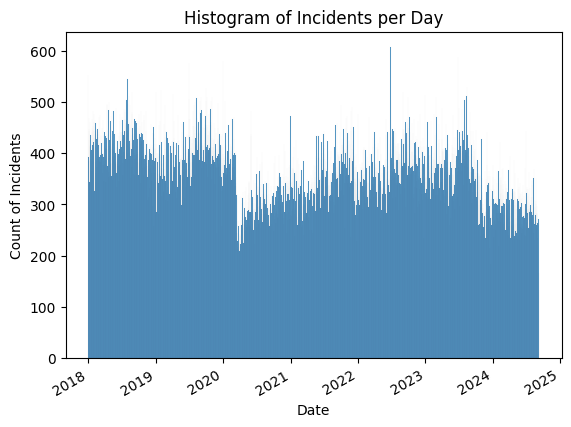

In [16]:
sns.histplot(data=clean_df, x='date', discrete=True)
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Count of Incidents')
plt.title('Histogram of Incidents per Day')
plt.show()

In [17]:
clean_df.resolution.value_counts(normalize=True)

resolution
Open or Active          0.802504
Cite or Arrest Adult    0.189738
Unfounded               0.005007
Exceptional Adult       0.002751
Name: proportion, dtype: float64

In [18]:
temp_copy = clean_df.copy()

temp_copy = temp_copy.drop(columns=['report_datetime', 'row_id', 
                   'incident_id', 'incident_number', 'cad_number', 
                   'latitude', 'longitude', 'point',  'esncag_-_boundary_file',
                   'central_market/tenderloin_boundary_polygon_-_updated',
                   'civic_center_harm_reduction_project_boundary',
                   'hsoc_zones_as_of_2018-06-05', 'invest_in_neighborhoods_(iin)_areas']) 

In [19]:
temp = temp_copy.head(1000)

In [20]:
temp.columns

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_type_code', 'report_type_description',
       'filed_online', 'incident_code', 'incident_category',
       'incident_subcategory', 'incident_description', 'resolution',
       'intersection', 'cnn', 'police_district', 'analysis_neighborhood',
       'supervisor_district', 'supervisor_district_2012', 'neighborhoods',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

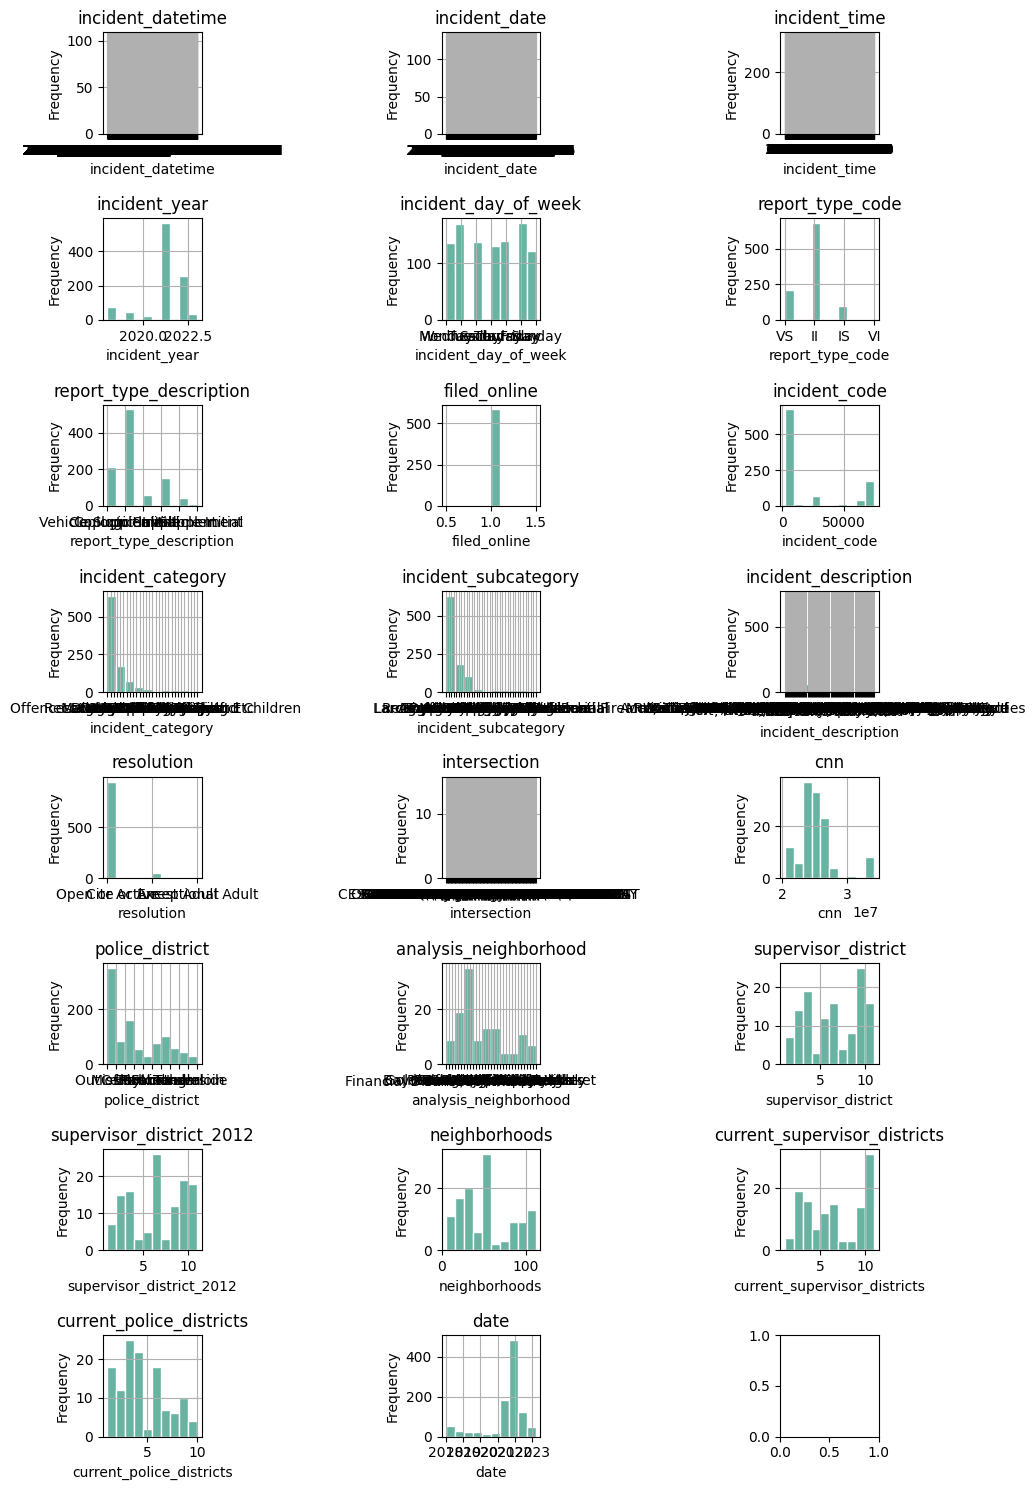

In [21]:
graph_features(temp, 8, 3, figsize=(10, 15))

In [22]:
# feature_df = temp[['incident_datetime', 'incident_date', 'incident_time', 'incident_year', 'incident_day_of_week']]
# graph_features(feature_df, 3, 2)

In [23]:
temp_copy.columns

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_type_code', 'report_type_description',
       'filed_online', 'incident_code', 'incident_category',
       'incident_subcategory', 'incident_description', 'resolution',
       'intersection', 'cnn', 'police_district', 'analysis_neighborhood',
       'supervisor_district', 'supervisor_district_2012', 'neighborhoods',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

In [24]:
temp_copy.incident_description.head(5)

datetime
2023-03-13 23:41:00        Vehicle, Recovered, Auto
2023-03-01 05:02:00    Theft, Other Property, >$950
2023-03-13 13:16:00        Vehicle, Recovered, Auto
2023-03-13 10:59:00        Vehicle, Recovered, Auto
2023-03-14 18:44:00        Vehicle, Recovered, Auto
Name: incident_description, dtype: object

In [25]:
temp_copy.shape

(887173, 23)

In [26]:
temp_copy.incident_description.value_counts()

incident_description
Theft, From Locked Vehicle, >$950                    105701
Malicious Mischief, Vandalism to Property             29110
Battery                                               27086
Vehicle, Recovered, Auto                              26681
Vehicle, Stolen, Auto                                 25981
                                                      ...  
Hazardous Materials, Spill Load                           1
Scalping Tickets                                          1
Embezzlement, Grand Theft Public/Private Official         1
Gaming & Horse Racing (general)                           1
Accidental Burns                                          1
Name: count, Length: 852, dtype: int64

In [27]:
temp_copy.incident_category.value_counts()

incident_category
Larceny Theft                                   264308
Other Miscellaneous                              60400
Malicious Mischief                               59929
Assault                                          54925
Non-Criminal                                     51628
Burglary                                         49318
Motor Vehicle Theft                              48631
Recovered Vehicle                                36026
Fraud                                            28696
Warrant                                          26085
Lost Property                                    25882
Drug Offense                                     22801
Robbery                                          19929
Missing Person                                   19195
Suspicious Occ                                   18297
Disorderly Conduct                               15396
Offences Against The Family And Children         11764
Miscellaneous Investigation                    